# The ArcGIS Python API
ESRI has created a Python package called `arcgis` that, among other things, leverages on-line resources. We'll revisit all that this Python package can do later, but focus here on how we can use it to access and download spatial data hosted in the cloud, either on ArcGIS Online or via ArcGIS Servers. 

Documentaion: 
* Main site: https://developers.arcgis.com/python/
* The GIS submodule: https://developers.arcgis.com/python/guide/the-gis-module/

## Step 1. Create the *GIS object* and authenticate it
* Resource: https://developers.arcgis.com/python/guide/using-the-gis/
The ArcGIS API can be used "anonomously", or we can authenticate that we are ESRI license holders to tap into its full capabilities. Authentication is easy if you are using a Python environment derived from an ArcGIS Pro installation (and you've logged in at least once to ArcGIS Pro); otherwise, it can be a bit tricky - and you'll still need at least an ArcGIS Online account. 

Either way, it begins with installing the `GIS` module from the ArcGIS package. 

In [1]:
#Import the module
from arcgis import GIS

Next we have to create a "GIS" object, which is our gateway to the fun. To do this anonymously, we could use the statement  `gis = GIS()`. But we'll authenticate with our ArcGIS Pro account: 

In [4]:
#Create the GIS object, authenticating with your ArcGIS Pro account
gis = GIS('pro')

In [6]:
#Reveal a bit of documentation abot this object
gis?

### Step 2. Searching for and accessing content
* Resource: [https://developers.arcgis.com/python/guide/accessing-and-creating-content/](https://developers.arcgis.com/python/guide/accessing-and-creating-content/#searching-for-content)
Through the ArcGIS API, we can access to all content shared on ArcGIS Online! We just need to locate what we need by searching for it, which is done via the `content` property of our `gis` object, also refered to as the "Content Manager".

#### A simple search
Here we search for all Feature Layers located in Duke's AGOL portal. *Note: by default, searches are limited to items shared within your own AGOL organization*

In [7]:
# search and list all "feature layer" items shared at Duke
search_result = gis.content.search(query="", item_type="Feature Layer")
search_result

[<Item title:"Duke_Railroads" type:Feature Layer Collection owner:jk398_dukeuniv>,
 <Item title:"median income choropleth" type:Feature Layer Collection owner:jrl_dukeuniv>,
 <Item title:"Primary Election 2017 (Percent)" type:Feature Layer Collection owner:at193_dukeuniv>,
 <Item title:"Sheet1_CopyFeatures" type:Feature Layer Collection owner:arv13_dukeuniv>,
 <Item title:"Hot Spots Field4" type:Feature Layer Collection owner:agh22_dukeuniv>,
 <Item title:"TSDF" type:Feature Layer Collection owner:bjl28_dukeuniv>,
 <Item title:"may and june" type:Feature Layer Collection owner:afp15_dukeuniv>,
 <Item title:"Aggregation of Wake County Submarkets to USA ZIP Codes (2013)" type:Feature Layer Collection owner:thaddeus.murray>,
 <Item title:"Travel from MLK (MLK_Entry_Webb) (5 10 Minutes)" type:Feature Layer Collection owner:jesse.cleary>,
 <Item title:"NYC63" type:Feature Layer Collection owner:mab108_dukeuniv>]

To see what other "item_types" we can search for, consult the [Search reference](https://developers.arcgis.com/rest/users-groups-and-items/search-reference.htm) page, specifically the [page](https://developers.arcgis.com/rest/users-groups-and-items/items-and-item-types.htm) listing item-types.

► Write the code to reveal all the "Map" items shared within Duke. 

In [15]:
search_result = gis.content.search(query="", item_type="Layer")
search_result

[<Item title:"TOP" type:Layer owner:mab108_dukeuniv>,
 <Item title:"Devon Park UMC Community Garden selection" type:Layer owner:bjl28_dukeuniv>,
 <Item title:"BOTTOM" type:Layer owner:mab108_dukeuniv>,
 <Item title:"cc_ctrs_1000_feet_3 or more" type:Layer owner:bjl28_dukeuniv>,
 <Item title:"nc_duplin_parcels_pt_2017_10_19" type:Layer owner:bjl28_dukeuniv>,
 <Item title:"PointDensity_PRE1978" type:Layer owner:bjl28_dukeuniv>,
 <Item title:"NPL_Sites2 Lead" type:Layer owner:bjl28_dukeuniv>,
 <Item title:"nc_parcels_pt selectionPRE1978" type:Layer owner:bjl28_dukeuniv>,
 <Item title:"POLS" type:Layer owner:anb29_dukeuniv>,
 <Item title:"cenbg2010" type:Layer owner:bjl28_dukeuniv>]

► Try some other search parameters:
* `query="", item_type="Image"`
* `query="owner:john.fay"`
* `query="owner:nconemap",outside_org=True`

In [25]:
search_result = gis.content.search(query="owner:nconemap",outside_org=True)
search_result

[<Item title:"Parcels Map" type:Web Map owner:nconemap>,
 <Item title:"High Quality Water/Outstanding Resource Water (HQWORW) Management Zones" type:Feature Layer Collection owner:nconemap>,
 <Item title:"Type A Current Public Water Systems (2004)" type:Feature Layer Collection owner:nconemap>,
 <Item title:"North Carolina Minor League Baseball Tour" type:Web Mapping Application owner:nconemap>,
 <Item title:"Map 3 - Acquisition Summary" type:Web Map owner:nconemap>,
 <Item title:"Contours: 4' Interval" type:Feature Layer Collection owner:nconemap>,
 <Item title:"2013 Orthoimagery Summary" type:Web Map owner:nconemap>,
 <Item title:"Geodetic Control Points" type:Feature Layer Collection owner:nconemap>,
 <Item title:"Hurricanes and Tropical Systems" type:Web Map owner:nconemap>,
 <Item title:"Orthoimagery: Before and After Rectification" type:Web Mapping Application owner:nconemap>]

You can display snapshots of the services returned in the Jupyter notebook using the IPython display object

<Item title:"Parcels Map" type:Web Map owner:nconemap>
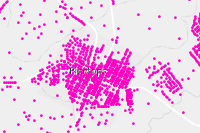

<Item title:"High Quality Water/Outstanding Resource Water (HQWORW) Management Zones" type:Feature Layer Collection owner:nconemap>
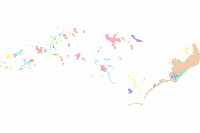

<Item title:"Type A Current Public Water Systems (2004)" type:Feature Layer Collection owner:nconemap>
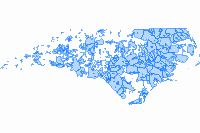

<Item title:"North Carolina Minor League Baseball Tour" type:Web Mapping Application owner:nconemap>
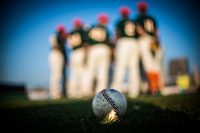

<Item title:"Map 3 - Acquisition Summary" type:Web Map owner:nconemap>
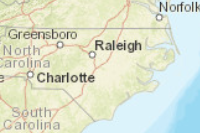

In [26]:
#Display the first 5 items in the last search result
from IPython.display import display
for item in search_result[:5]:
    display(item)

### Working with `items`
Our search results returned a number of `item` objects. Documentation on what you can do with these objects is found in the arcgis python api documentation: https://esri.github.io/arcgis-python-api/apidoc/html/ (Expand the `arcgis.gis module` entry on the left, then select `item`)

In [38]:
parcels = search_result[0]
type(parcels)

arcgis.gis.Item

In [37]:
#Show the ID of the parcel
parcels.id

'44282f5a8fd746a0a68be0f8f74fc1c2'

In [63]:
parcels.type

'Web Map'

In [64]:
parcels.

'public'

### Downloading data
https://developers.arcgis.com/labs/python/download-data/

In [ ]:
#What is the ID of the dataset you want to download
data_ID = '44282f5a8fd746a0a68be0f8f74fc1c2'